In [1]:
import numpy as np
import xarray as xr
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large'})
sns.set_palette('colorblind')

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
prefix = 'uncharged_'
raw_data = xr.open_dataset('data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')
raw_data.coords['mn'] = raw_data.coords['mn'].astype('<U8')
raw_data = raw_data.sel(NaCl=0.8)

thermo = xr.open_dataset('data/{}thermo_data.nc'.format(prefix))['THERMO']
# For some reason the data-type isn't preserved and loads back as '|S8'
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
thermo.coords['mn'] = thermo.coords['mn'].astype('<U8')
thermo = thermo.sel(NaCl=0.8)

r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)

In [4]:
thermo.coords['epsilon']

<xarray.DataArray 'epsilon' (epsilon: 23)>
array([ 0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,
        2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,
        4.9])
Coordinates:
    NaCl     float64 0.8
  * epsilon  (epsilon) float64 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 ...

<IPython.core.display.Javascript object>


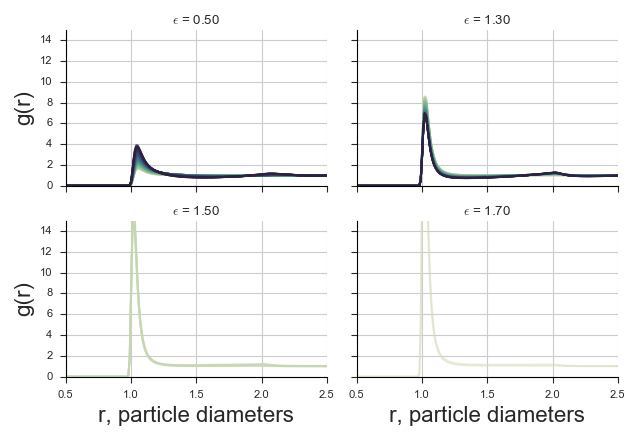

In [15]:
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(sio2s, sns.cubehelix_palette(n_colors=len(sio2s), start=.5, rot=-.75)))

# f, ax = plt.subplots()
# labeled = set()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
pick_axis = {0.5: ax1, 1.3: ax2, 1.5: ax3, 1.7: ax4}

for sio2, eps in it.product(raw_data.coords['SiO2'],raw_data.coords['epsilon']) :
    g_r = raw_data.sel(epsilon=eps, SiO2=sio2, data='g_r', mn='50-18')
    if np.isnan(g_r[10]):
        continue
    if sio2.item() % 10 == 0 and sio2.item() not in labeled:
        lab = r'SiO$_2$ wt%={:.2f}'.format(sio2.item(), eps.item())
        labeled.add(sio2.item())
    else:
        lab = ''
    if round(eps.item(), 2) not in pick_axis:
        continue
    ax = pick_axis[round(eps.item(), 2)]
    ax.set_title(r'$\epsilon$ = {:.2f}'.format(eps.item()))
    ax.plot(r, g_r, 
            color=colors[sio2.item()],
            label=lab,
            alpha=0.5)
ax.set_xlim(0.5, 2.5)
ax.set_ylim(0, 15)
# ax.legend(loc='upper right', fontsize=12)
ax3.set_xlabel(r'r, particle diameters', fontsize=20)
ax4.set_xlabel(r'r, particle diameters', fontsize=20)
ax1.set_ylabel('g(r)', fontsize=20)
ax3.set_ylabel('g(r)', fontsize=20)

# ax.set_xlabel('r, particle diameters', fontsize=20)
# ax.set_ylabel('g(r)', fontsize=20)

plt.tight_layout()
sns.despine()
f.savefig('uncharged_g_r.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


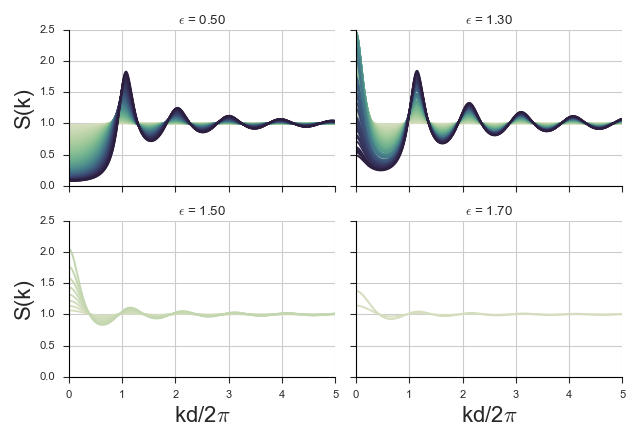

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [11]:
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(sio2s, sns.cubehelix_palette(n_colors=len(sio2s), start=.5, rot=-.75)))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
pick_axis = {0.5: ax1, 1.3: ax2, 1.5: ax3, 1.7: ax4}
# labeled = set()
lines = list()
labels = list()
for sio2, eps in it.product(raw_data.coords['SiO2'],raw_data.coords['epsilon']) :
    s_k = raw_data.sel(epsilon=eps, SiO2=sio2, data='S_k', mn='50-18')
    if np.isnan(s_k[10]):
        continue
    if sio2.item() % 10 == 0:
        lab = r'SiO$_2$ wt%={:.2f}'.format(sio2.item())
    else:
        lab = ''
    
    if round(eps.item(), 2) not in pick_axis:
        continue
    ax = pick_axis[round(eps.item(), 2)]
    ax.set_title(r'$\epsilon$ = {:.2f}'.format(eps.item()))

    l = ax.plot(k/(2*np.pi), s_k, 
            color=colors[sio2.item()],
            label=lab)
    lines.append(l)
ax4.set_xlim(0, 5)
ax4.set_ylim(0)
ax4.legend(loc='lower right', fontsize=12, ncol=2)


ax3.set_xlabel(r'kd/2$\pi$', fontsize=20)
ax4.set_xlabel(r'kd/2$\pi$', fontsize=20)
ax1.set_ylabel('S(k)', fontsize=20)
ax3.set_ylabel('S(k)', fontsize=20)

plt.tight_layout()
sns.despine()
f.savefig('uncharged_s_k.pdf', bbox_inches='tight')